In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("water_quality_index.csv")

In [ ]:
data

,Date,Temperature (°C),Dissolved Oxygen (mg/L),pH,BOD (mg/L),WQI
0,2023-01-01,22.49,7.09,6.83,2.24,75.9
1,2023-01-02,34.01,11.69,8.13,2.54,88.9
2,2023-01-03,29.64,11.24,7.83,2.31,89.5
3,2023-01-04,26.97,5.57,7.55,6.46,61.1
4,2023-01-05,18.12,4.55,7.22,3.45,66.2
...,...,...,...,...,...,...
360,2023-12-27,22.76,10.73,8.39,7.52,70.1
361,2023-12-28,27.87,5.12,7.80,5.83,60.7
362,2023-12-29,24.17,10.36,7.72,5.74,77.0
363,2023-12-30,25.91,5.61,7.53,2.51,73.2


In [ ]:
data.shape

(365, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     365 non-null    object 
 1   Temperature (°C)         365 non-null    float64
 2   Dissolved Oxygen (mg/L)  365 non-null    float64
 3   pH                       365 non-null    float64
 4   BOD (mg/L)               365 non-null    float64
 5   WQI                      365 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB


In [ ]:
wqi_data = data[["Date", "WQI"]]

In [ ]:
wqi_data

,Date,WQI
0,2023-01-01,75.9
1,2023-01-02,88.9
2,2023-01-03,89.5
3,2023-01-04,61.1
4,2023-01-05,66.2
...,...,...
360,2023-12-27,70.1
361,2023-12-28,60.7
362,2023-12-29,77.0
363,2023-12-30,73.2


In [ ]:
wqi_data["Date"] = pd.to_datetime(wqi_data["Date"])

In [ ]:
wqi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    365 non-null    datetime64[ns]
 1   WQI     365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [ ]:
#Time series data and tradition data>> the difference is time series has a time component
#Therefore date column should be index.
#slicing of data on date columns becomes easy
#visulaisation is simple
#Libraries related to forecasting models assumes that there is a time/date column

In [ ]:
wqi_data = wqi_data.set_index("Date")

In [ ]:
wqi_data

,WQI
Date,
2023-01-01,75.9
2023-01-02,88.9
2023-01-03,89.5
2023-01-04,61.1
2023-01-05,66.2
...,...
2023-12-27,70.1
2023-12-28,60.7
2023-12-29,77.0


In [ ]:
#steps:
#step 1: summary>>mean, median, mode
#step 2> visualise the time series data, rolling mean and standard deviation, trend seasonalit and noise
#decomposition of time srries
#step 3>> stationarity check>> visualisation or statistical test(ADF)
#step 4:ACF and PACF
#step 5: Outliers


In [ ]:
wqi_data.describe()

,WQI
count,365.000000
mean,72.137534
std,9.520175
min,51.800000
25%,65.000000
50%,72.100000
75%,78.500000
max,94.700000


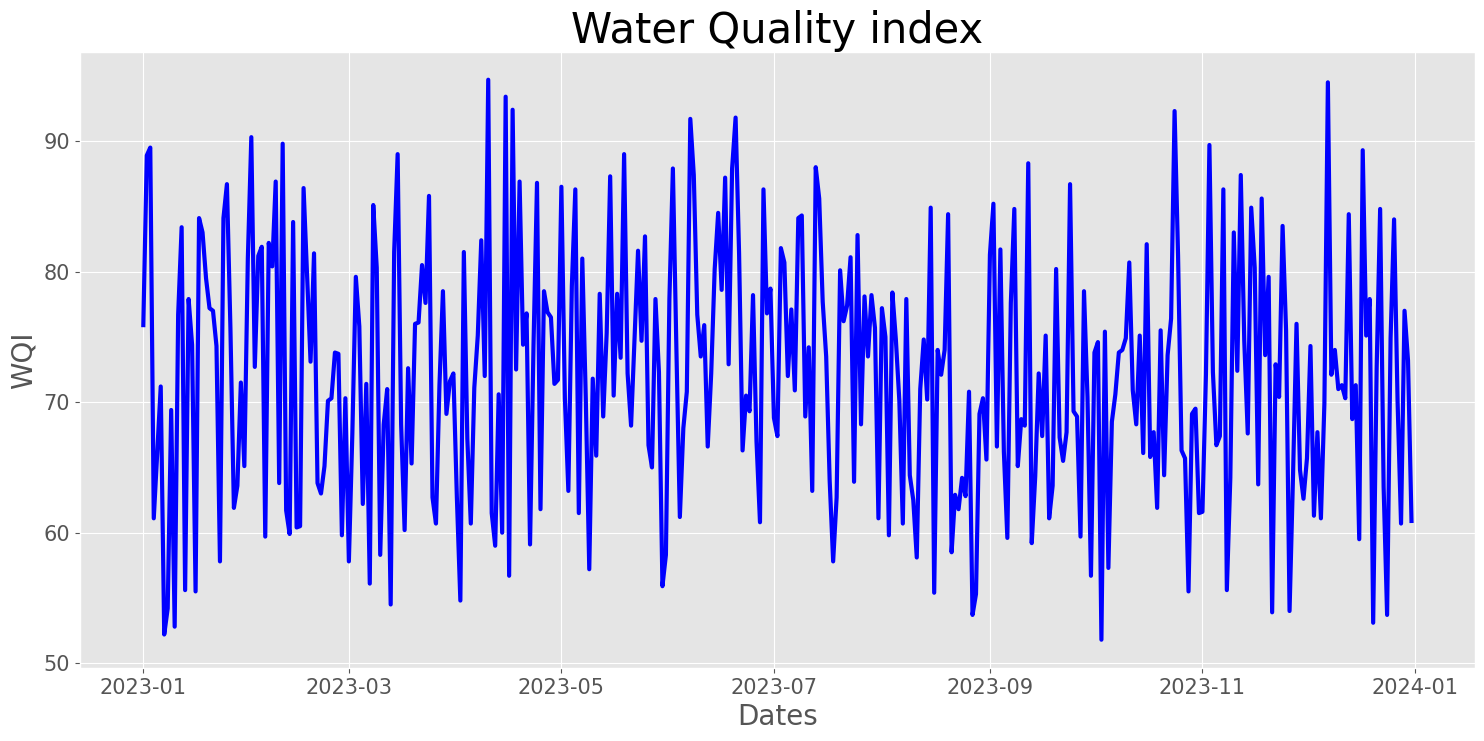

In [ ]:
#line chart for closing price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('WQI', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(wqi_data['WQI'], linewidth = 3, color = 'blue')
plt.title('Water Quality index', fontsize = 30)
plt.show()

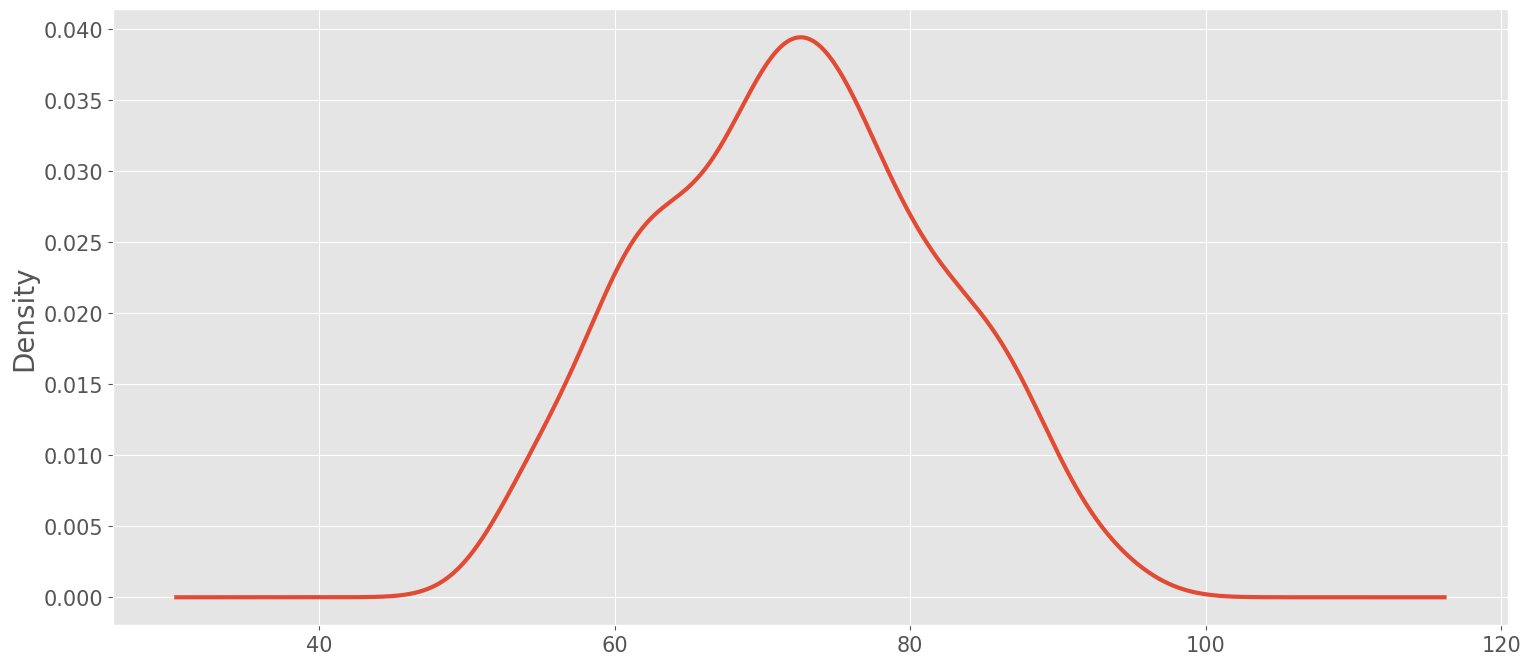

In [ ]:
#distribution plot of closing price
df_close = wqi_data["WQI"]
df_close.plot(kind = 'kde', figsize = (18, 8), linewidth = 3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel("Density", fontsize = 20)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
rolling_mean = wqi_data["WQI"].rolling(48).mean() #simple moving average
rolling_std = wqi_data["WQI"].rolling(48).std()

In [ ]:
rolling_std

,WQI
Date,
2023-01-01,NaN
2023-01-02,NaN
2023-01-03,NaN
2023-01-04,NaN
2023-01-05,NaN
...,...
2023-12-27,9.796759
2023-12-28,9.803769
2023-12-29,9.832574


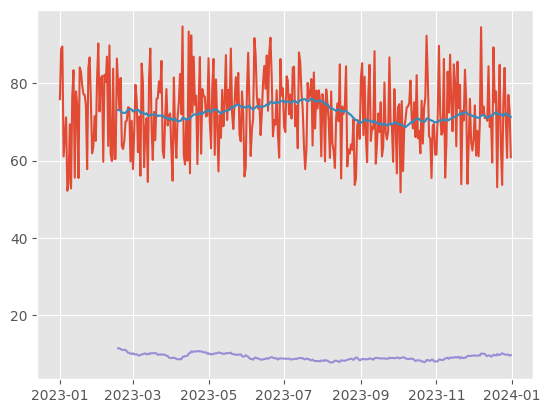

In [ ]:
plt.plot(wqi_data.WQI)
plt.plot(rolling_mean)
plt.plot(rolling_std)

In [ ]:
#From the plot above, it is clear that time series is stationary
#lets reverify by statistical test as well > ADF test

In [ ]:
from statsmodels.tsa.stattools import adfuller #reverify by adft test
adft = adfuller(wqi_data["WQI"])

In [ ]:
adft #null hypotheis of adf test is time series is non stationary, pvalue<0.05, reject null hypothesis
#here pvalue> 0.05, it means series is non stationary

(-18.837427891826486,
 0.0,
 0,
 364,
 {'1%': -3.4484434475193777,
  '5%': -2.869513170510808,
  '10%': -2.571017574266393},
 2537.8037253394814)

In [ ]:
pd.Series(adft[0:4], index = ["test_statistics", "p-value", 'lag', 'no of data points'])

,0
test_statistics,-18.837428
p-value,0.000000
lag,0.000000
no of data points,364.000000


In [ ]:
#you can visualize and get varified with the same function
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


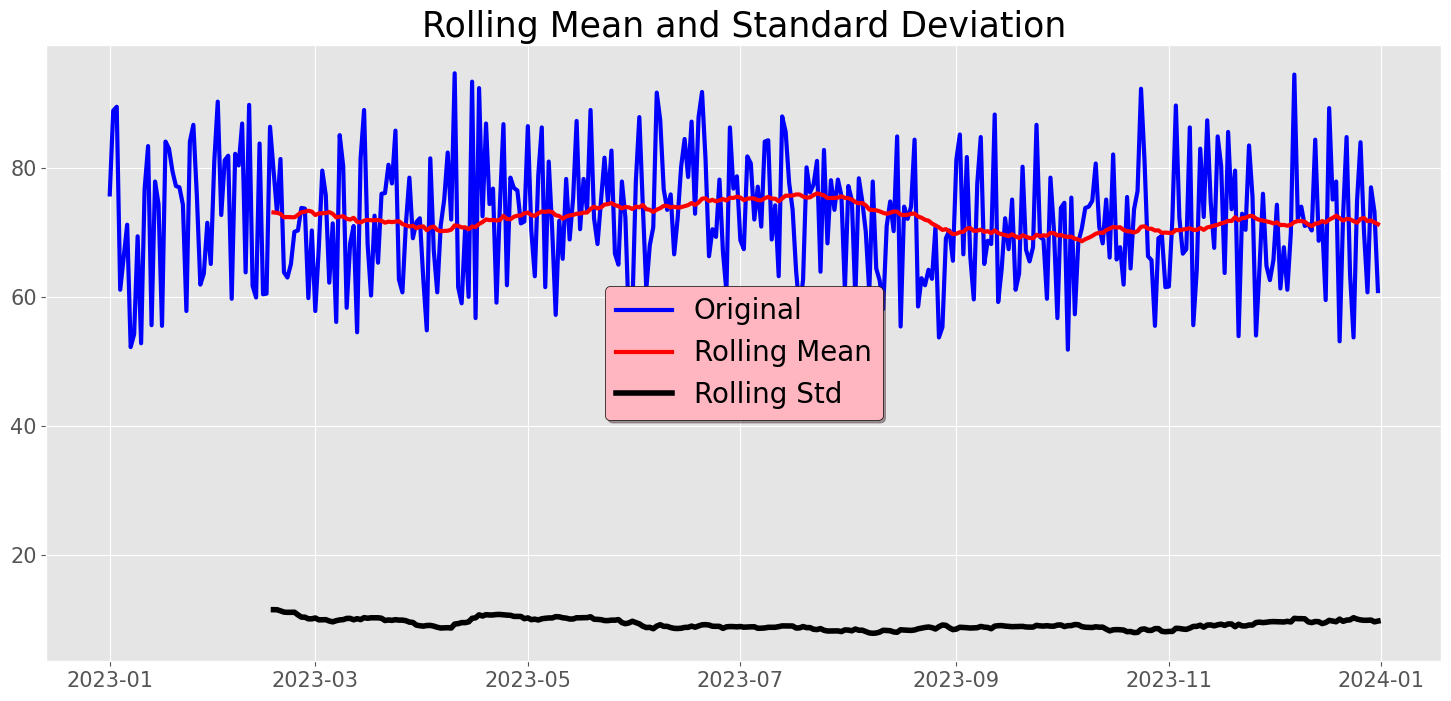

Results of dickey fuller test
Test Statistics                -18.837428
p-value                          0.000000
No. of lags used                 0.000000
Number of observations used    364.000000
critical value (1%)             -3.448443
critical value (5%)             -2.869513
critical value (10%)            -2.571018
dtype: float64


In [ ]:
test_stationarity(wqi_data.WQI)

In [ ]:
#decomposition of time imto different things
#A time series is made up of level, trend, seasonalit, noise
#time series is of two types>> additive and multiplicative

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(wqi_data[['WQI']], period = 12) #for 12 months

In [ ]:
result.seasonal

,seasonal
Date,
2023-01-01,-0.601954
2023-01-02,2.583391
2023-01-03,1.903075
2023-01-04,0.103362
2023-01-05,1.656380
...,...
2023-12-27,-0.601954
2023-12-28,2.583391
2023-12-29,1.903075


<Figure size 2000x1000 with 0 Axes>

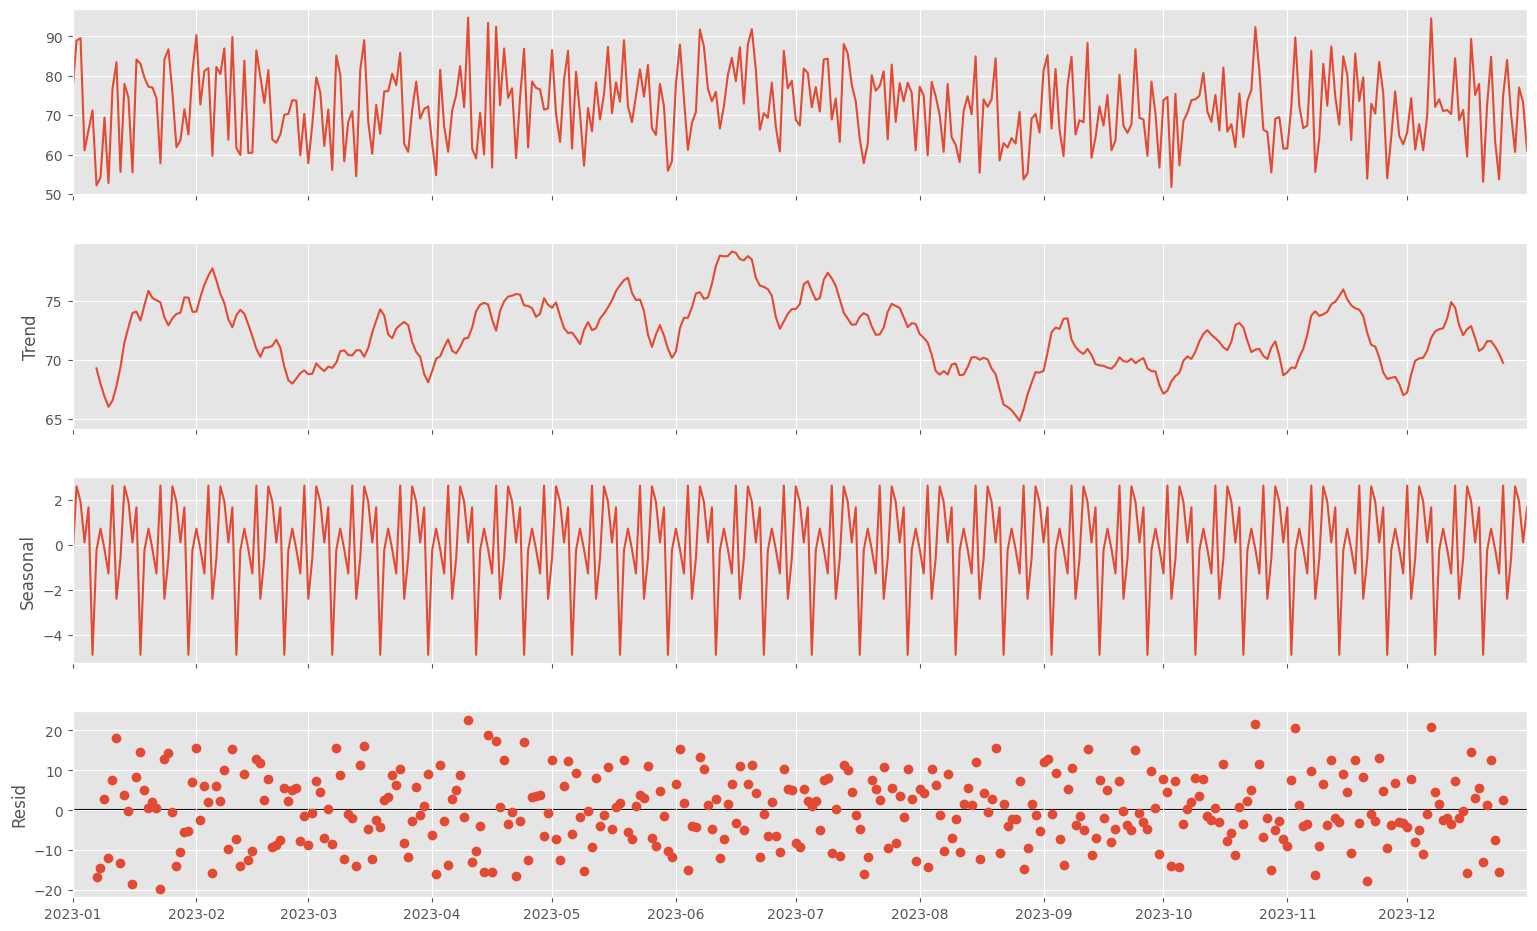

In [ ]:
fig = plt.figure(figsize = (20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)

<Figure size 2000x1000 with 0 Axes>

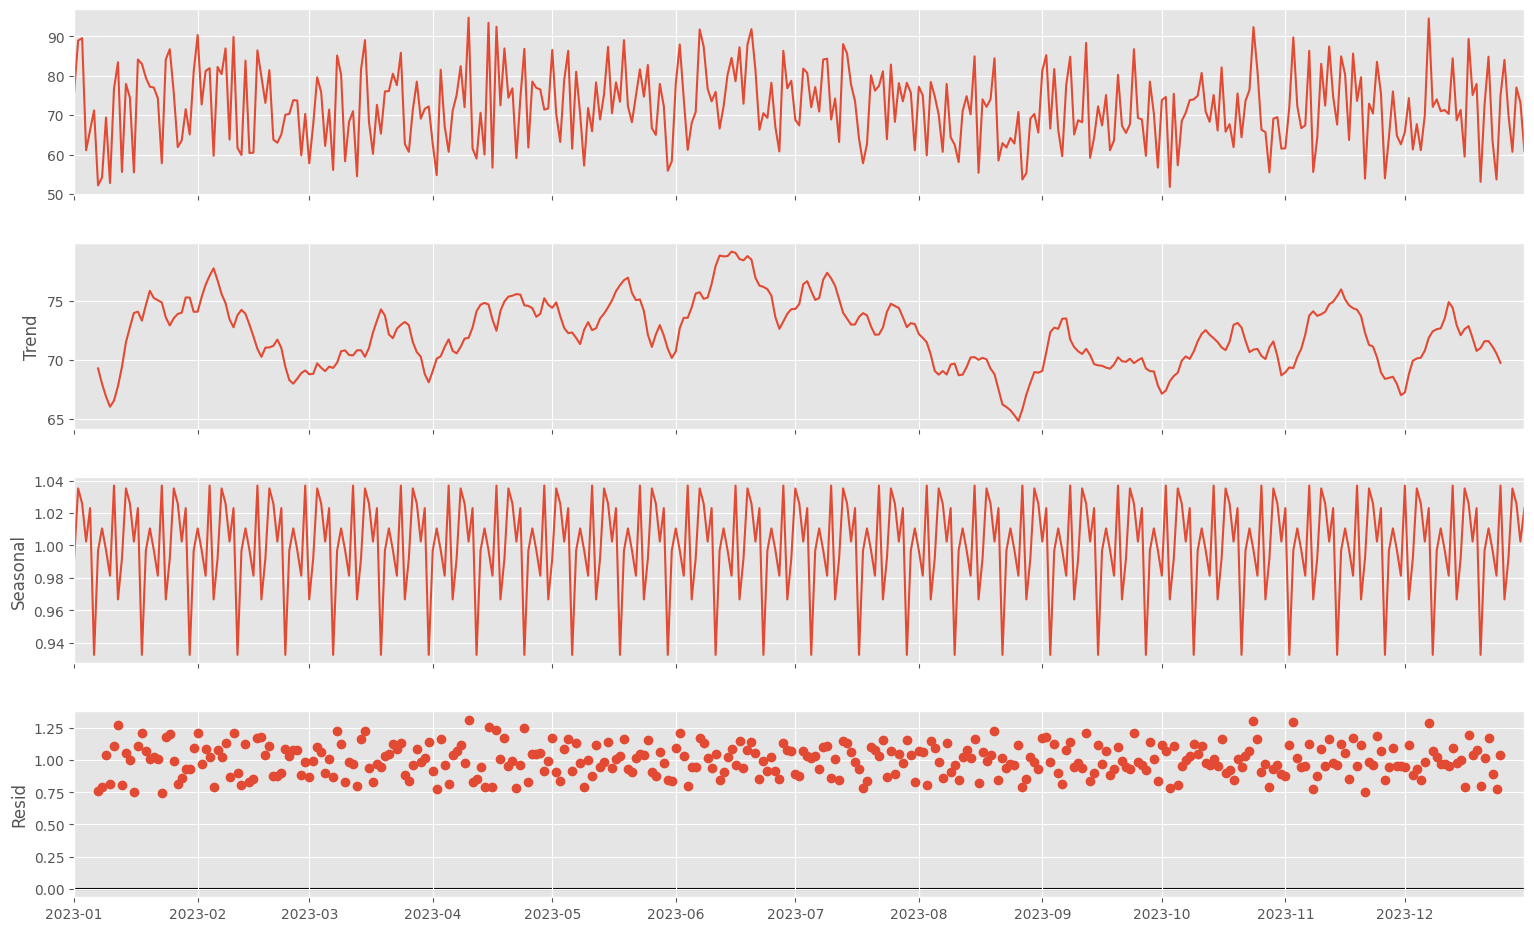

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(wqi_data[['WQI']], period = 12, model = "mutiplicative")
fig = plt.figure(figsize = (20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)

In [ ]:
#use multiplicative time series when you have some sudden increase the spick

<Axes: ylabel='WQI'>

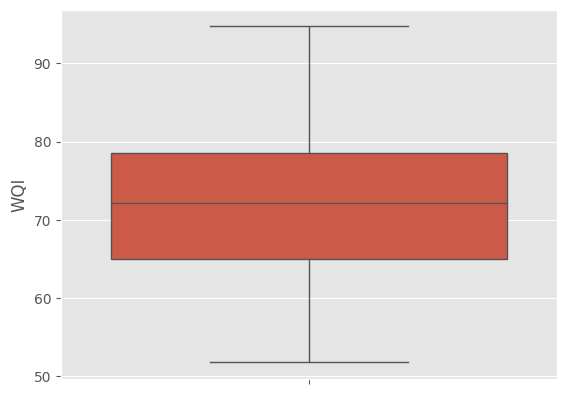

In [ ]:
sns.boxplot(wqi_data.WQI)

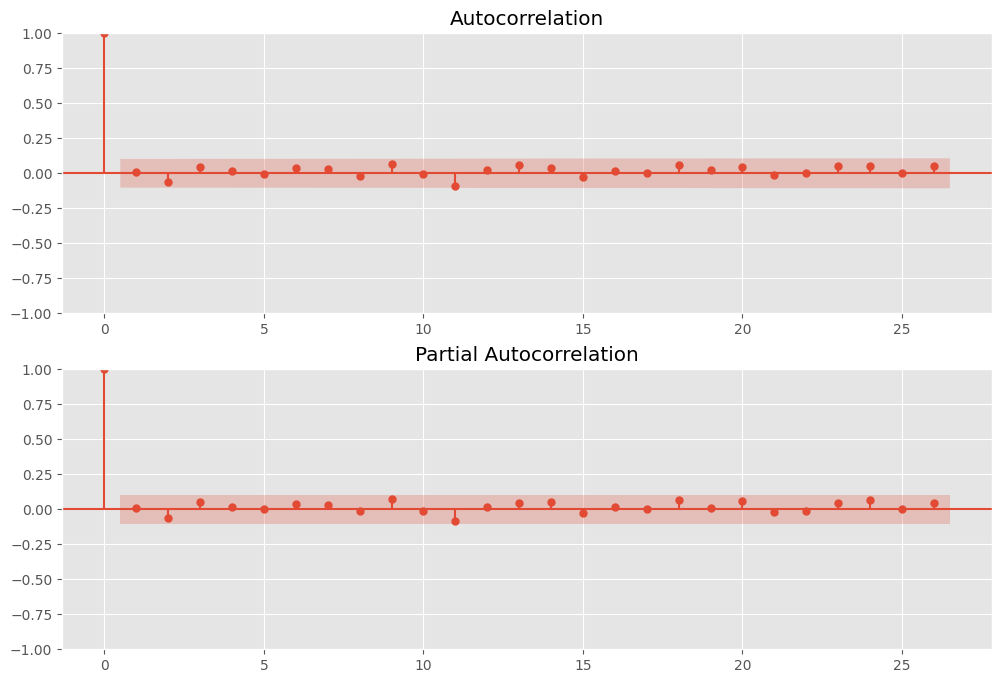

In [ ]:
#ACF/PACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize = (12, 8))
plot_acf(wqi_data, ax = axes[0])
plot_pacf(wqi_data, ax = axes[1])
plt.show()
#since series is non stationary, results are not good

In [ ]:
#To make time series stationary>> differencing
df_close = df_close.diff() #by default 1st order differencing, provide values for other differening
df_close = df_close.dropna()

In [ ]:
df_close

,WQI
Date,
2023-01-02,13.0
2023-01-03,0.6
2023-01-04,-28.4
2023-01-05,5.1
2023-01-06,5.0
...,...
2023-12-27,-13.9
2023-12-28,-9.4
2023-12-29,16.3


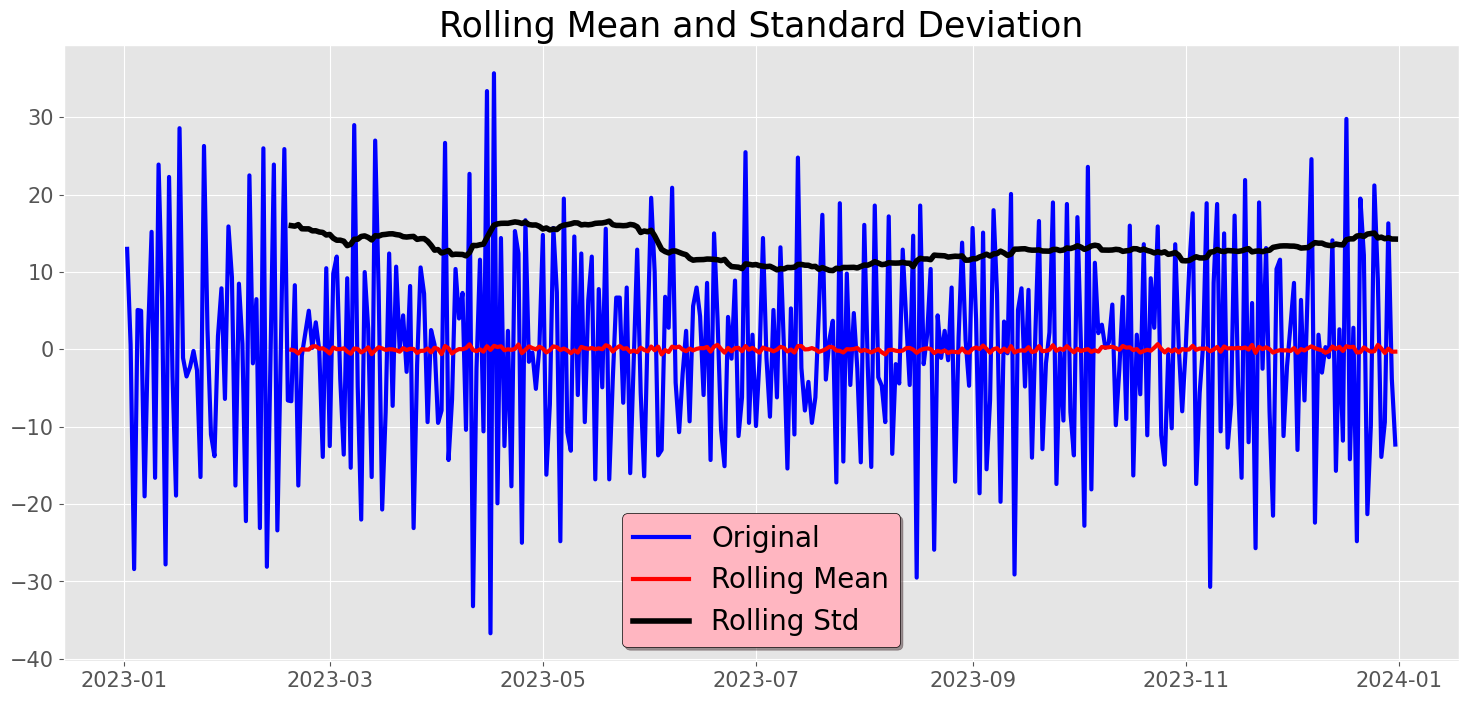

Results of dickey fuller test
Test Statistics               -9.048223e+00
p-value                        4.920150e-15
No. of lags used               1.200000e+01
Number of observations used    3.510000e+02
critical value (1%)           -3.449119e+00
critical value (5%)           -2.869810e+00
critical value (10%)          -2.571176e+00
dtype: float64


In [ ]:
#now check again the stationarity
test_stationarity(df_close)

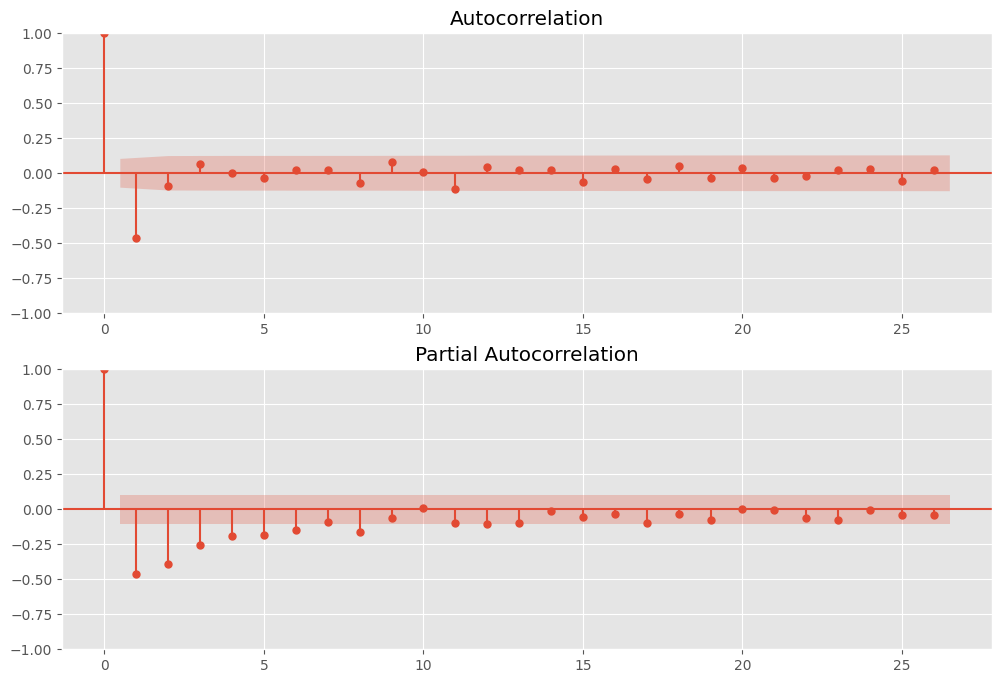

In [ ]:
#now pvalues is less than 0.05, reject the null>> time series is stationary, if not stationary, then again you need to differencing


from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize = (12, 8))
plot_acf(df_close, ax = axes[0])
plot_pacf(df_close, ax = axes[1])
plt.show()

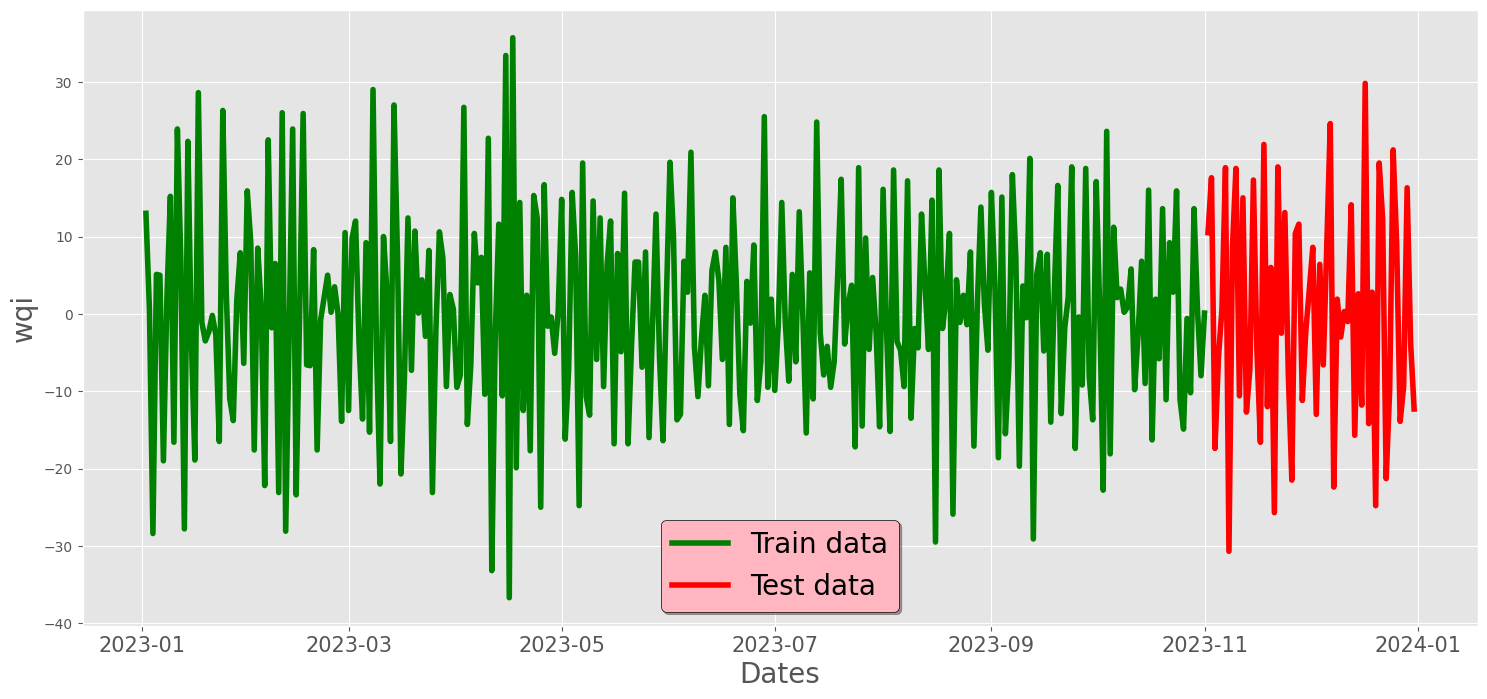

In [ ]:
train_data = df_close[0:-60]
test_data = df_close[-60:]
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('wqi', fontsize = 20)
plt.xticks(fontsize=15)
plt.plot(train_data, 'green', label = 'Train data', linewidth = 4)
plt.plot(test_data, 'red', label = 'Test data', linewidth = 4)
plt.legend(fontsize = 20, shadow=True, facecolor = 'lightpink', edgecolor='k')

**ARIMA**

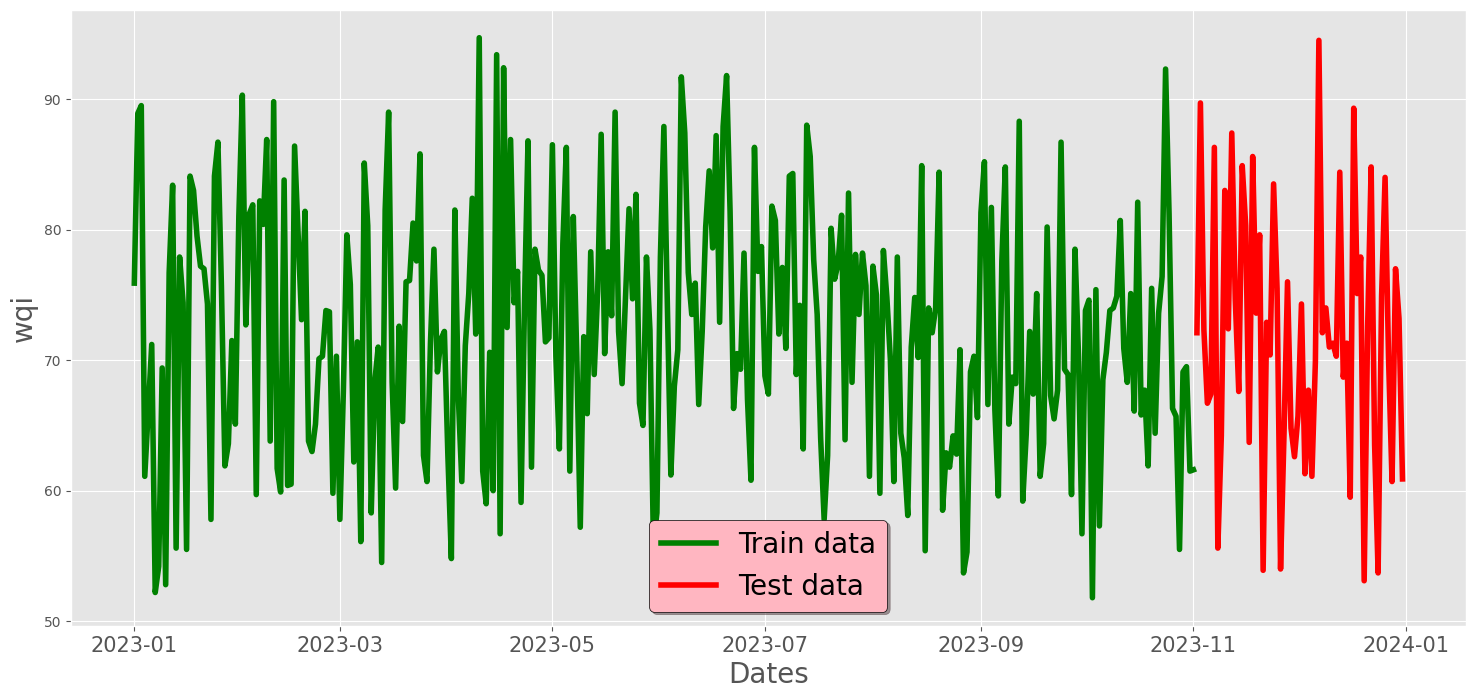

In [ ]:
#Now since we will use ARIMA, we dont need stationary time series data
#why> ARIMA itself has inherent differencing parameter, which will make the series stationary
#I>> integrated
#we will use original time series data
#spliting train,test data based on date
train_data = wqi_data[0:-60] #all the data exept last 60 rows
test_data = wqi_data[-60:]#last 60 rows
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('wqi', fontsize = 20)
plt.xticks(fontsize=15)
plt.plot(train_data, 'green', label = 'Train data', linewidth = 4)
plt.plot(test_data, 'red', label = 'Test data', linewidth = 4)
plt.legend(fontsize = 20, shadow=True, facecolor = 'lightpink', edgecolor='k')

In [ ]:
#model building
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
train_data

,WQI
Date,
2023-01-01,75.9
2023-01-02,88.9
2023-01-03,89.5
2023-01-04,61.1
2023-01-05,66.2
...,...
2023-10-28,55.5
2023-10-29,69.1
2023-10-30,69.5


In [ ]:
history = train_data['WQI']

In [ ]:
history

,WQI
Date,
2023-01-01,75.9
2023-01-02,88.9
2023-01-03,89.5
2023-01-04,61.1
2023-01-05,66.2
...,...
2023-10-28,55.5
2023-10-29,69.1
2023-10-30,69.5


In [ ]:
model = ARIMA(history, order = (1, 1, 1)) #p,d,q

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
model = model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    WQI   No. Observations:                  305
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1116.326
Date:                Wed, 27 Nov 2024   AIC                           2238.653
Time:                        06:56:26   BIC                           2249.804
Sample:                    01-01-2023   HQIC                          2243.113
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0071      0.057      0.123      0.902      -0.106       0.120
ma.L1         -0.9717      0.016    -58.991      0.000      -1.004      -0.939
sigma2        89.7422      8.984      9.990      0.000      72.135     107.350
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.99
Prob(Q):                              0.99   Prob(JB):                         0.05
Heteroskedasticity (H):               0.70   Skew:                             0.06
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.forecast() #next month forcast

,0
2023-11-02,70.043221


In [ ]:
model.forecast("2023-12-02") #predict is used for a range of values

,predicted_mean
2023-11-02,70.043221
2023-11-03,70.103115
2023-11-04,70.103540
2023-11-05,70.103543
2023-11-06,70.103543
2023-11-07,70.103543
2023-11-08,70.103543
2023-11-09,70.103543
2023-11-10,70.103543
2023-11-11,70.103543


In [ ]:
test_data = test_data['WQI']
test_data

,WQI
Date,
2023-11-02,72.1
2023-11-03,89.7
2023-11-04,72.3
2023-11-05,66.7
2023-11-06,67.4
2023-11-07,86.3
2023-11-08,55.6
2023-11-09,64.2
2023-11-10,83.0


In [ ]:
mean_squared_error([test_data[0]], model.forecast())

4.2303414398214265

In [ ]:
np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

2.056779385306413

In [ ]:
#we can treat p, d, q as hyperparameter
p_values = range(0, 3)
d_values =  range(0, 3)
q_values = range(0, 3)

for i in p_values:
    for j in d_values:
        for k in q_values:
            print(i, j, k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [ ]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

def evaluate_models(dataset, test, p_values, d_values, q_values):
    if isinstance(dataset, pd.DataFrame):
        dataset = dataset['WQI']
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset,test, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=9.754
ARIMA(0, 0, 1) RMSE=9.785
ARIMA(0, 0, 2) RMSE=9.704
ARIMA(0, 1, 0) RMSE=14.461
ARIMA(0, 1, 1) RMSE=9.907
ARIMA(0, 1, 2) RMSE=9.917
ARIMA(0, 2, 0) RMSE=24.250
ARIMA(0, 2, 1) RMSE=14.484
ARIMA(0, 2, 2) RMSE=9.981
ARIMA(1, 0, 0) RMSE=9.784
ARIMA(1, 0, 1) RMSE=9.813
ARIMA(1, 0, 2) RMSE=9.767
ARIMA(1, 1, 0) RMSE=13.201
ARIMA(1, 1, 1) RMSE=9.916


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2) RMSE=9.968
ARIMA(1, 2, 0) RMSE=19.783
ARIMA(1, 2, 1) RMSE=13.221


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

ARIMA(1, 2, 2) RMSE=9.988
ARIMA(2, 0, 0) RMSE=9.699


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 0, 1) RMSE=9.780


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

ARIMA(2, 0, 2) RMSE=9.705
ARIMA(2, 1, 0) RMSE=11.978
ARIMA(2, 1, 1) RMSE=9.803
ARIMA(2, 1, 2) RMSE=9.883
ARIMA(2, 2, 0) RMSE=17.904
ARIMA(2, 2, 1) RMSE=11.998


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

ARIMA(2, 2, 2) RMSE=9.858
Best ARIMA(2, 0, 0) RMSE=9.699


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#whichever rmse is lower take that value

In [ ]:
history = [x for x in train_data['WQI']]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA Model: 9.698621303069487


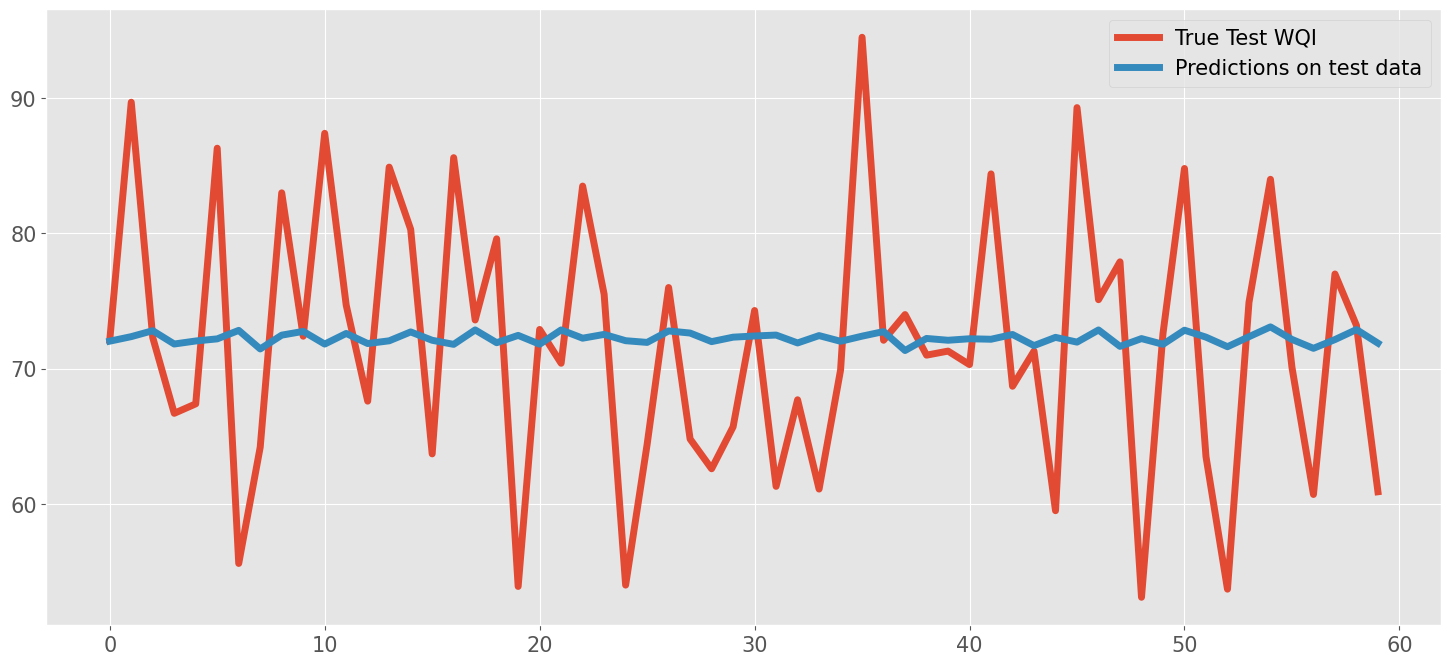

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.grid(True)
plt.plot(range(len(test_data)), test_data, label='True Test WQI', linewidth=5)
plt.plot(range(len(predictions)), predictions, label='Predictions on test data', linewidth=5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()


In [ ]:
fc_series = pd.Series(predictions, index=test_data.index)

In [ ]:
fc_series

,0
Date,
2023-11-02,[72.03416226294398]
2023-11-03,[72.36914526661539]
2023-11-04,[72.80895560978385]
2023-11-05,[71.82322162670701]
2023-11-06,[72.04722245686709]
2023-11-07,[72.20374225104949]
2023-11-08,[72.83064438369436]
2023-11-09,[71.46010736890058]
2023-11-10,[72.47917179490733]


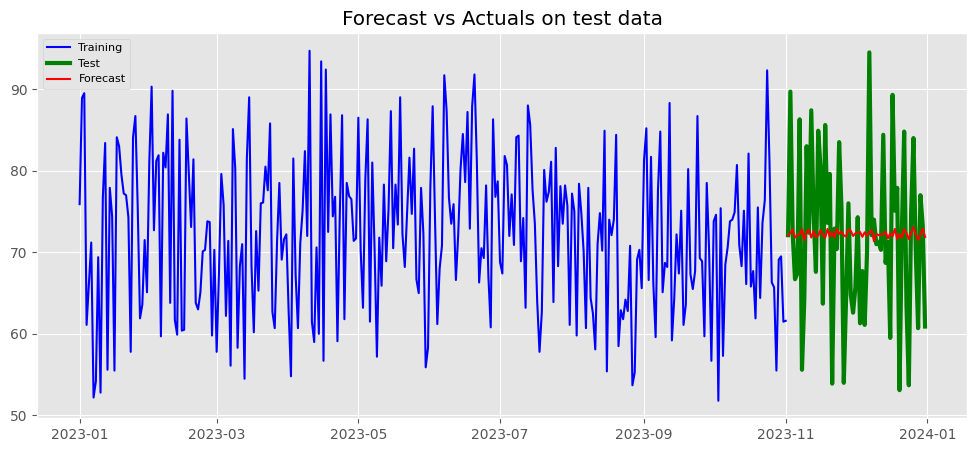

In [ ]:
#forecast value with actual test data
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data['WQI'], label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

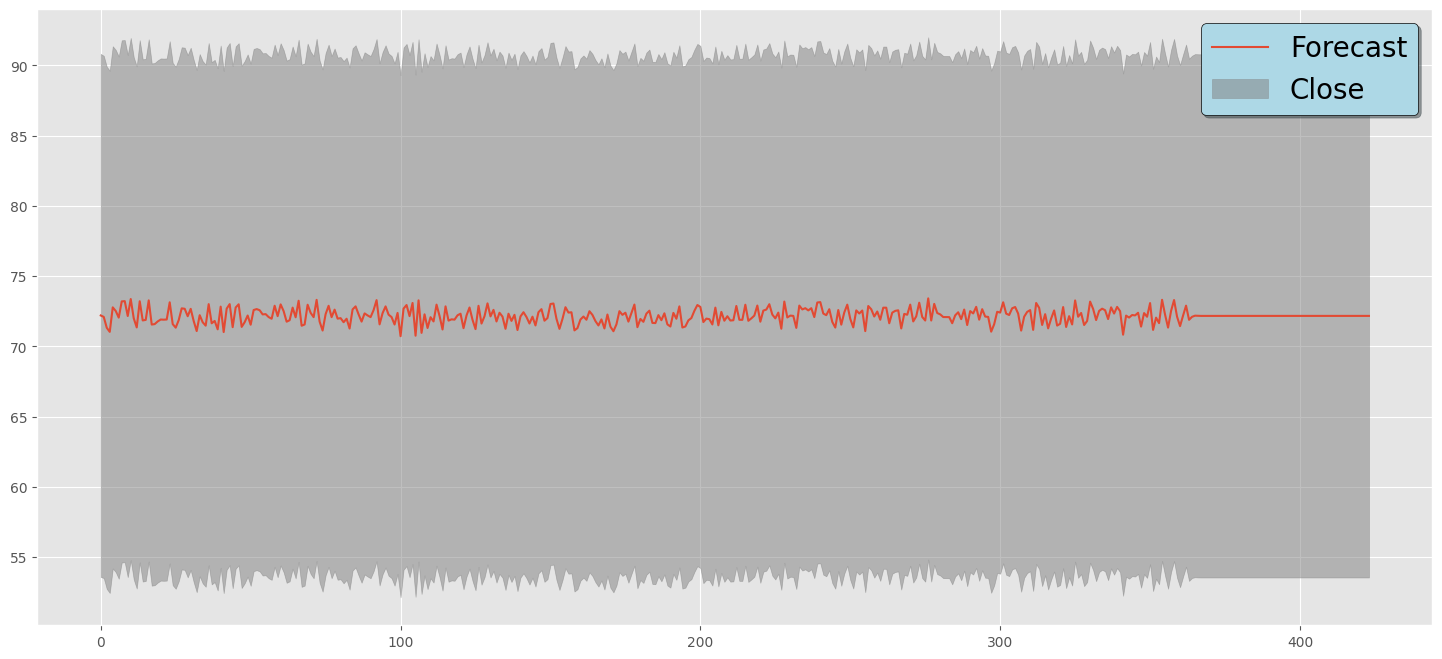

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

# **SARIMA**

In [ ]:
#SARIMA -p, d, q, P, Q, D,s

history = [x for x in train_data['WQI']]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 14.430896223823373


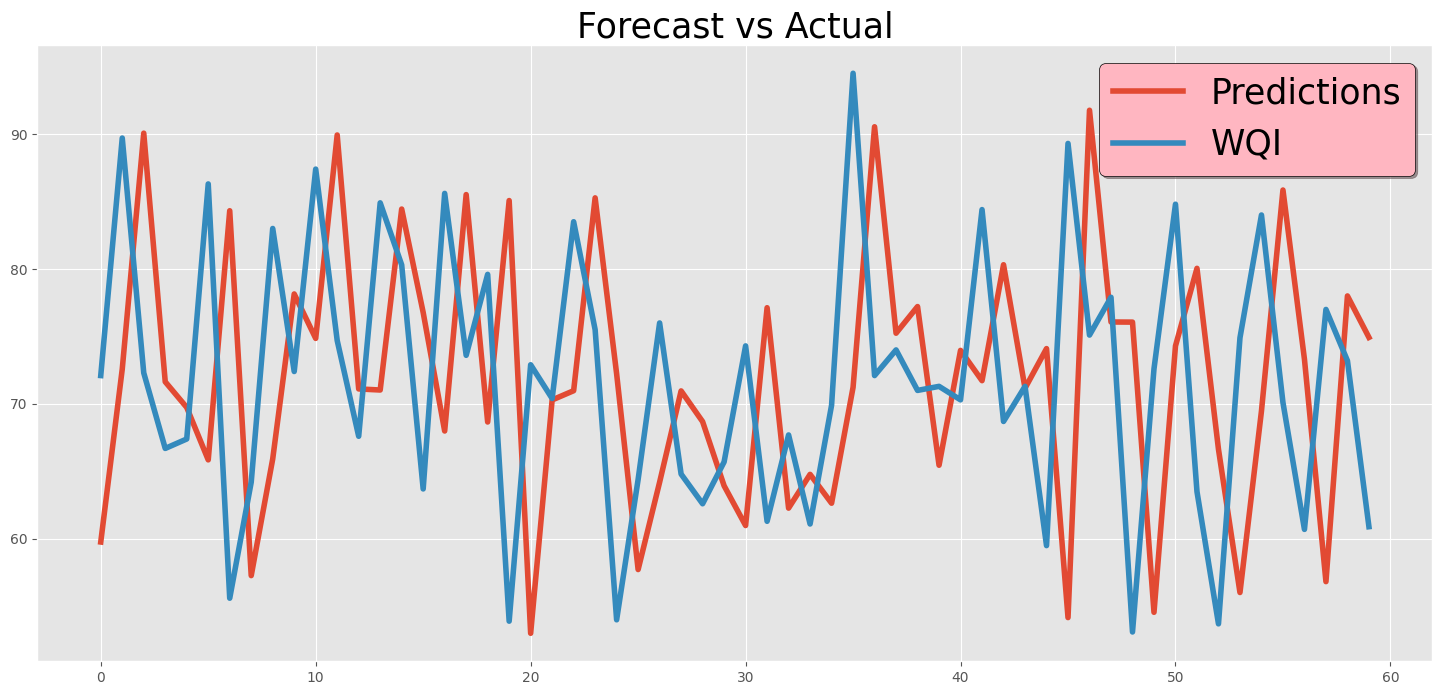

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'WQI', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')